<a href="https://colab.research.google.com/github/GuilhermeBorba2/Projetos-DataScience/blob/main/ST_MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
%pip install yfinance
import yfinance as yF
from google.colab import drive 

#manipulação de dados
import numpy as np
import pandas as pd

#visualização 
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

#calculos  estatisticos 
import scipy 
import warnings
warnings.filterwarnings("ignore")

# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 18,10


#formatando valores com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#carregar o dataset

cotacoes = yF.Ticker("BTC-USD")

#opçoes de periodo 1d,5d, 1mo, 3mo, 6mo, 1y, 2y, 5y,10y e ytd.
dados = cotacoes.history(period='1y')
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-27 00:00:00+00:00,44505.36,46827.55,44437.29,46820.49,28160889722,0.00,0.00
2022-03-28 00:00:00+00:00,46821.85,48086.84,46690.20,47128.00,36362175703,0.00,0.00
2022-03-29 00:00:00+00:00,47100.44,48022.29,47100.44,47465.73,31397059069,0.00,0.00
2022-03-30 00:00:00+00:00,47456.90,47655.15,46746.21,47062.66,29333883962,0.00,0.00
2022-03-31 00:00:00+00:00,47062.15,47512.03,45390.54,45538.68,33327427106,0.00,0.00


In [5]:
dados.drop('Dividends', axis=1, inplace=True)
dados.drop('Stock Splits', axis=1, inplace=True)
dados.columns = ['Abertura','Maximo','Minimo','Fechamento','Volume']
dados.head()

,Abertura,Maximo,Minimo,Fechamento,Volume
Date,,,,,
2022-03-27 00:00:00+00:00,44505.36,46827.55,44437.29,46820.49,28160889722
2022-03-28 00:00:00+00:00,46821.85,48086.84,46690.20,47128.00,36362175703
2022-03-29 00:00:00+00:00,47100.44,48022.29,47100.44,47465.73,31397059069
2022-03-30 00:00:00+00:00,47456.90,47655.15,46746.21,47062.66,29333883962
2022-03-31 00:00:00+00:00,47062.15,47512.03,45390.54,45538.68,33327427106


In [6]:
#observar o range de dados 
print("menor dada: ", dados.index.min())
print("maior data: ", dados.index.max())

menor dada:  2022-03-27 00:00:00+00:00
maior data:  2023-03-27 00:00:00+00:00


In [7]:
# Vamos observar os dados referente a ultima data do nosso conjunto de dados
display(dados.loc[dados.index.max()])


Abertura           28001.04
Maximo             28028.73
Minimo             26705.78
Fechamento         27027.00
Volume       17596053504.00
Name: 2023-03-27 00:00:00+00:00, dtype: float64

In [8]:
# Calculando o percentual de mudança na cotação de fechamento diário das ações
# Ou seja, quanto o valor de fechamento varia de um dia para outro, o retorno diário da ação
#variação diaria em %
retorno_diario = dados["Fechamento"].pct_change().dropna()
retorno_diario.head

<bound method NDFrame.head of Date
2022-03-28 00:00:00+00:00    0.01
2022-03-29 00:00:00+00:00    0.01
2022-03-30 00:00:00+00:00   -0.01
2022-03-31 00:00:00+00:00   -0.03
2022-04-01 00:00:00+00:00    0.02
                             ... 
2023-03-23 00:00:00+00:00    0.04
2023-03-24 00:00:00+00:00   -0.03
2023-03-25 00:00:00+00:00    0.00
2023-03-26 00:00:00+00:00    0.02
2023-03-27 00:00:00+00:00   -0.03
Name: Fechamento, Length: 365, dtype: float64>

In [9]:
dados = pd.merge(dados, retorno_diario, how = 'inner', on='Date')
dados.columns =['Abertura','Maximo','Minimo','Fechamento','Volume','Variacao_Diaria']
dados.head()

,Abertura,Maximo,Minimo,Fechamento,Volume,Variacao_Diaria
Date,,,,,,
2022-03-28 00:00:00+00:00,46821.85,48086.84,46690.20,47128.00,36362175703,0.01
2022-03-29 00:00:00+00:00,47100.44,48022.29,47100.44,47465.73,31397059069,0.01
2022-03-30 00:00:00+00:00,47456.90,47655.15,46746.21,47062.66,29333883962,-0.01
2022-03-31 00:00:00+00:00,47062.15,47512.03,45390.54,45538.68,33327427106,-0.03
2022-04-01 00:00:00+00:00,45554.16,46616.24,44403.14,46281.64,38162644287,0.02


In [10]:
#tipo de dados
dados.dtypes

Abertura           float64
Maximo             float64
Minimo             float64
Fechamento         float64
Volume               int64
Variacao_Diaria    float64
dtype: object

In [11]:
dados.shape

(365, 6)

In [12]:
  dados.describe()

,Abertura,Maximo,Minimo,Fechamento,Volume,Variacao_Diaria
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,23915.19,24361.31,23406.54,23860.77,29799364798.89,-0.00
std,7415.93,7539.77,7207.51,7320.40,12634022810.07,0.03
min,15782.30,16253.05,15599.05,15787.28,7714767174.00,-0.16
25%,19325.97,19635.80,19025.23,19323.91,22536575684.00,-0.01
50%,21526.46,21802.72,20955.14,21528.09,28011716745.00,-0.00
75%,24640.03,25190.33,24225.11,24641.28,34569088416.00,0.01
max,47456.90,48086.84,47100.44,47465.73,118992465607.00,0.11


# visualizando o preço diário de fechamento  das ações  no tempo

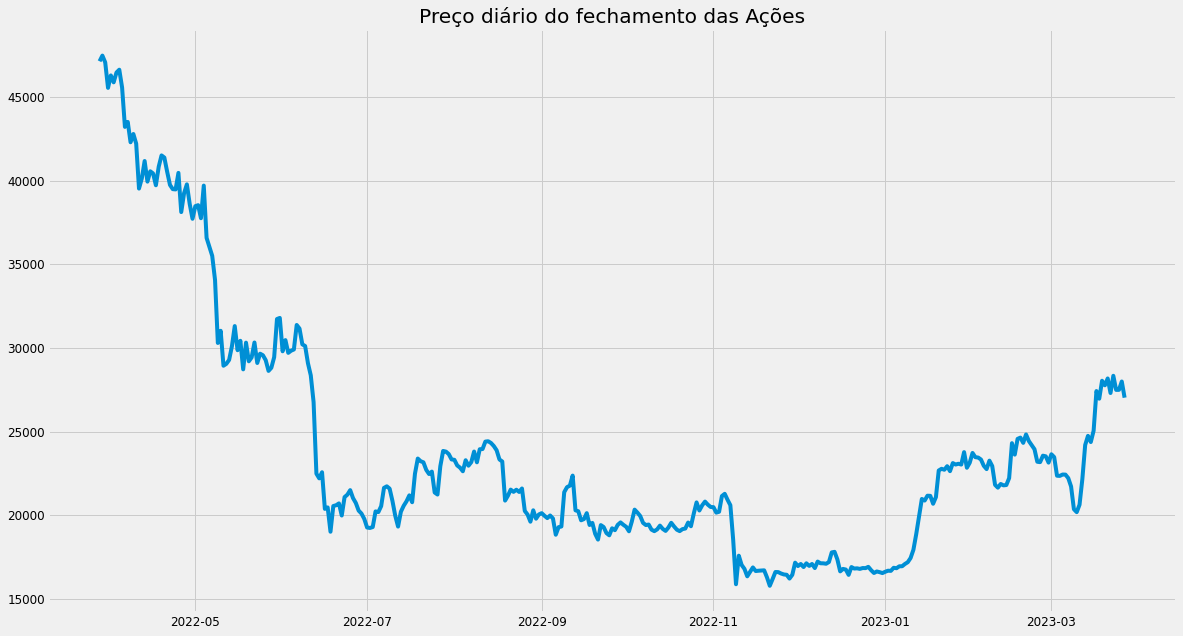

In [15]:
#plot
plt.plot(dados['Fechamento'])
plt.title('Preço diário do fechamento das Ações')
plt.show()


In [21]:
#retorno acumulado
#iremos usar pra projeção da tendencia 
retorno_diario_acumulado = (1 + retorno_diario).cumprod() - 1
retorno_diario_acumulado.max()

0.013781108465627412

#Análise Exploratoria e Estatística Descritiva

In [22]:
# Média do fechamento diário da cotação das ações
media_retorno_diario = np.mean(retorno_diario)


In [23]:
#Desvio padrão do fechamento diario da cotação das ações
desvio_retorno_diario = np.std(retorno_diario)

In [26]:
#quanto menor o desvio padrão mais normal é a distribuição

#Media e desvio padrão
print('Media do Retono Diário: ',media_retorno_diario)
print('Desvio padrão do fechamento diario: ',desvio_retorno_diario)

Media do Retono Diário:  -0.0009882940583292395
Desvio padrão do fechamento diario:  0.031908097079740114


Vamos considerar o ano com 364 dias de funcionamento por ser um criptoativo. Caso seja uma ação normal, devemos considerar somente 252 dias do ano, pois a operação de ações ocorre somente de segunda a sexta


In [27]:
#media e desvio padrão  no ano(considerado 364 dias de operações)
rmaf = (1+ media_retorno_diario)**364 -1
print('Retorno Médio Anualizado de fechamento: ',rmaf)

dpaf= desvio_retorno_diario*np.sqrt(364)

print('Desvio Padrão Anualizado de fechamento: ',dpaf)

Retorno Médio Anualizado de fechamento:  -0.3022657074676468
Desvio Padrão Anualizado de fechamento:  0.6087676929396332


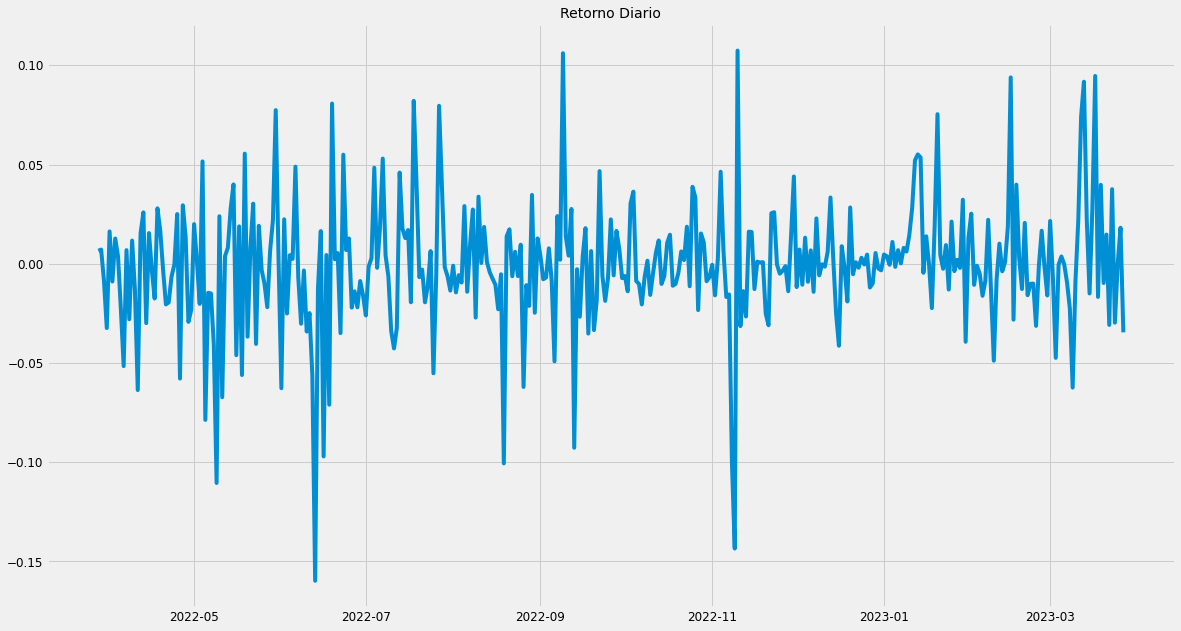

In [29]:
#plot
plt.plot(retorno_diario)
plt.title('Retorno Diario', size=14)
plt.show()

Com apenas quatro grandes variações, o retorno diário tem sido constante ao longo do tempo. Vamos criar um histograma com a dstribuição do retorno diário.

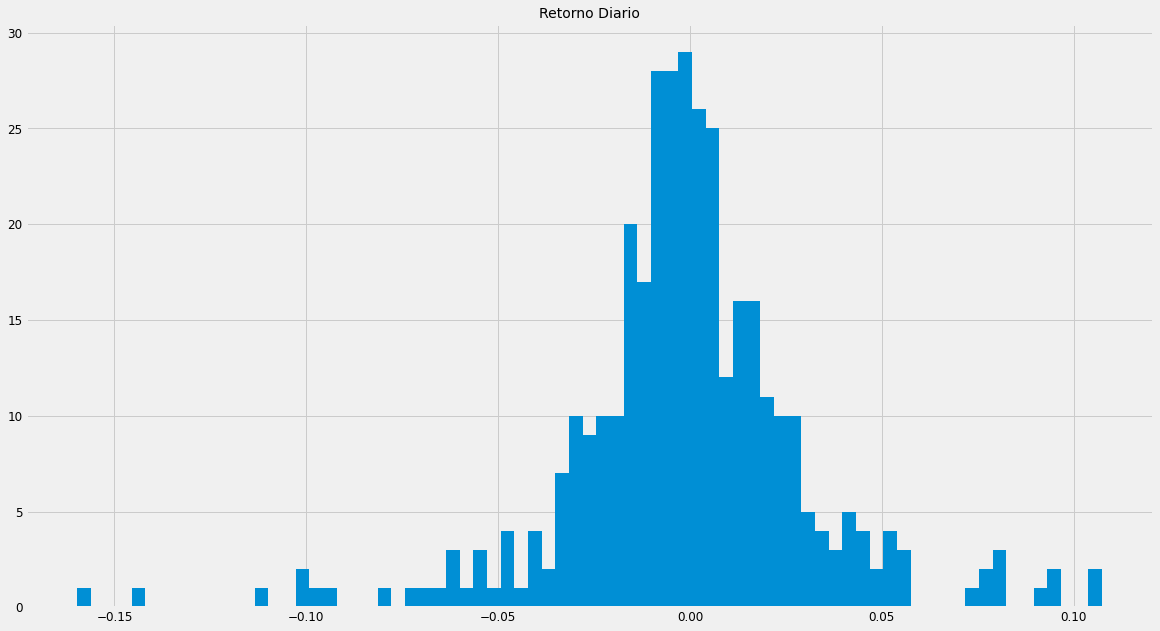

In [32]:
#histograma com a distribuição do retorno diario
plt.hist(retorno_diario, bins=75)
plt.title('Histograma Retorno Diario', size=14)
plt.show()

Os valores estão bem próximos mesmo da média.

In [33]:
# Transformação de log e diferenciação para cálculo do retorno diário
log_retorno_diario = (np.log(dados["Fechamento"]) - np.log(dados["Fechamento"]).shift(-1)).dropna()

# Calculamos média e desvio padrão após a transformação
log_media_retorno_diario = np.mean(log_retorno_diario)
log_desvio_retorno_diario = np.std(log_retorno_diario)

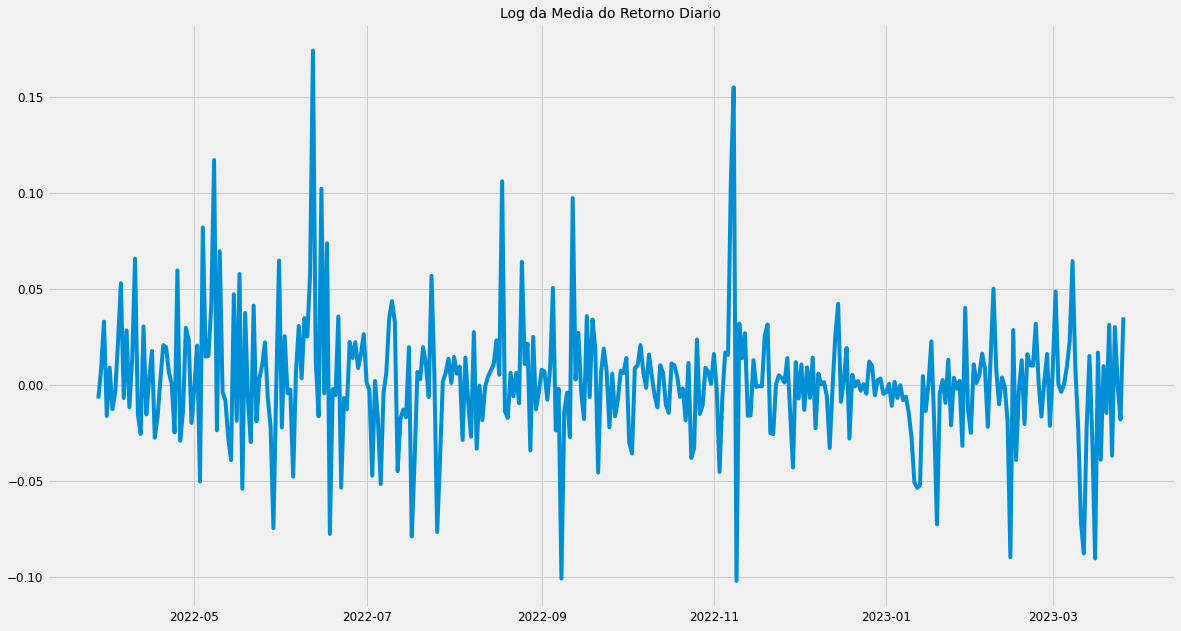

In [36]:
plt.plot(log_retorno_diario)
plt.title('Log da Media do Retorno Diario',size=14)
plt.show()

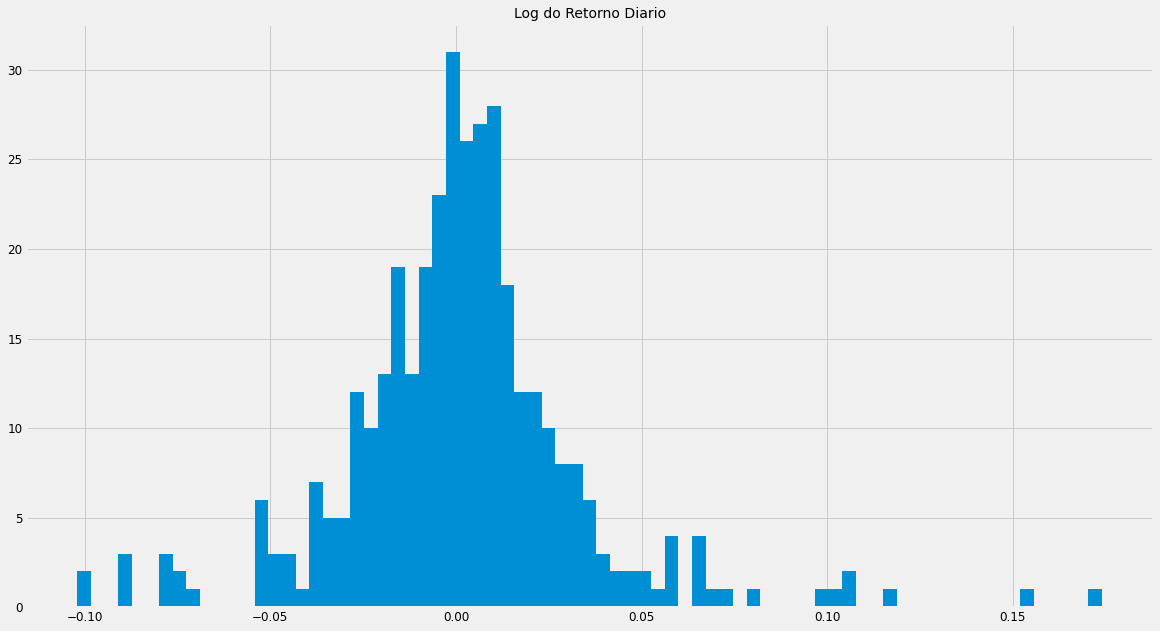

In [37]:
plt.hist(log_retorno_diario, bins=75)
plt.title('Log do Retorno Diario', size=14)
plt.show()

com o log, ele centralizou mais 

### Valor Historico 

In [38]:
#nivel de variancia
var_level = 95
var = np.percentile(log_retorno_diario, 100 - var_level)
print("certeza de que as perdas diarias não excederão o Var% em um determinado dia com base em valores historicos.")
print("VAR 95%", var)

certeza de que as perdas diarias não excederão o Var% em um determinado dia com base em valores historicos.
VAR 95% -0.047714659537072636


In [39]:
#var para os proximos 5 dias
var * np.sqrt(5)

-0.10669322224815307

## Valor historico condicional 

In [40]:
# Nível de variância
var_level = 95
var = np.percentile(log_retorno_diario, 100 - var_level)
cvar = log_retorno_diario[log_retorno_diario < var].mean()
print("Nos piores 5% dos casos, as perdas foram, em média, superiores ao percentual histórico.")
print("CVaR 95%:", cvar)

Nos piores 5% dos casos, as perdas foram, em média, superiores ao percentual histórico.
CVaR 95%: -0.0703618040135907


## Simulação de Monte Carlo

In [41]:
# Simulação de Monte Carlo

# Número de dias a frente
dias_posteriores = 180

# Número de simulações
simulacoes = 2500

# Último valor da ação
ultimo_preco = 27027.00

# Cria um array vazio com as dimensões 
results = np.empty((simulacoes, dias_posteriores))

# Loop por cada simulação
for s in range(simulacoes):
    
    # Calcula o retorno com dados randômicos seguindo uma distribuição normal
    random_returns = 1 + np.random.normal(loc = log_media_retorno_diario, 
                                          scale = log_desvio_retorno_diario, 
                                          size = dias_posteriores)
    
    result = ultimo_preco * (random_returns.cumprod())
    
    results[s, :] = result

In [42]:
# Definindo o índice da série simulada
index = pd.date_range("2023-03-28", periods = dias_posteriores, freq = "D")
resultados = pd.DataFrame(results.T, index = index)
media_resultados = resultados.apply("mean", axis = 1)

## Resultado da simulação de Monte Carlo

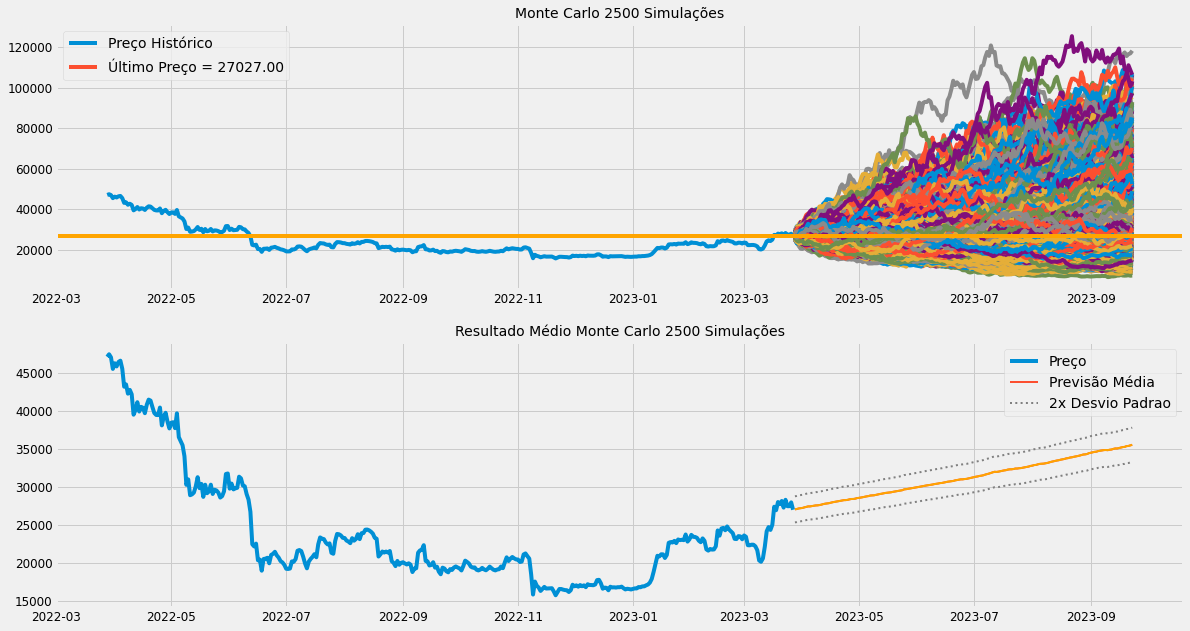

In [43]:
# Dividindo a área de plotagem em 2 subplots
fig, ax = plt.subplots(nrows = 2, ncols = 1)

# Plot
ax[0].plot(dados["Fechamento"][:"2023-09-23"])

ax[0].plot(resultados)

ax[0].axhline(27027.00, c = "orange")

ax[0].set_title(f"Monte Carlo {simulacoes} Simulações", size = 14)

ax[0].legend(["Preço Histórico", "Último Preço = 27027.00"])

ax[1].plot(dados["Fechamento"][:"2023-09-23"])

ax[1].plot(resultados.apply("mean", axis = 1), lw = 2)

ax[1].plot(media_resultados.apply((lambda x: x * (1+1.96 * log_desvio_retorno_diario))), 
           lw = 2, linestyle = "dotted", c = "gray")

ax[1].plot(media_resultados, lw = 2, c = "orange")

ax[1].plot(media_resultados.apply((lambda x: x * (1-1.96 * log_desvio_retorno_diario))), 
           lw = 2, linestyle = "dotted", c = "gray")

ax[1].set_title(f"Resultado Médio Monte Carlo {simulacoes} Simulações", size = 14)

ax[1].legend(["Preço", "Previsão Média", "2x Desvio Padrao"])

plt.show()